# Part 3: Proposal to Foreign Investors
Students must write a proposal to foreign investors, analyzing key difference and challenge faced in their investment decisions. Students will be required to integrate both an economic and political analysis with some kind of forecast on markets using scenario planning, identifying the effects of likely fiscal and monetary policy responses and their effect on the investment environment. This would date from 2009 and would include responses to the Global Financial Crisis of 2007-2009.

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import scipy.linalg
import statsmodels.api as sm

from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

## Introduction

Using the same techniques from part 2 of our project, we will employ random forests to identify top economic features and the use two of the most important features in scenario planning (OLS).

---
## Gross Domestic Product (GDP)

### Import Data

In [2]:
data = pd.read_csv('../Data/final_data.csv', index_col=0)

In [3]:
data.drop('current_account_balance.1', axis=1, inplace=True)  # Drop col as it is a duplicate
data.drop('investment_gfcf', axis=1, inplace=True)  # Drop Investment GFCF as I suspect data leakage

In [4]:
data.head()

,gold,exchange_rate,share_prices,long_term_interest_rate,m3,unemployment,gdp,current_account_balance,cpi,ores_metal_imports,prime_energy
1992,-0.059758,0.032318,0.051715,-0.111649,0.083262,-0.005682,-0.020642,0.922480,0.618688,0.067813,0.680000
1993,0.159970,0.136074,0.135122,-0.188515,0.061992,0.000450,0.014399,1.000000,0.621071,0.109464,0.866667
1994,-0.021083,0.083073,0.339478,0.308533,0.136966,-0.000800,0.031810,0.738137,0.636458,0.084646,0.920000
1995,0.010921,0.021257,0.026136,-0.143101,0.132802,-0.168419,0.030687,0.532462,0.475443,0.489150,1.000000
1996,-0.045363,0.170034,0.187810,0.106116,0.165970,0.217209,0.040257,0.593971,0.607916,0.174308,0.946667


### Feature importance

In [5]:
y_gdp = data['gdp']
X_gdp = data.drop(['gdp', 'share_prices', 'current_account_balance'], axis=1)

In [6]:
y_gdp.head()

1992   -0.020642
1993    0.014399
1994    0.031810
1995    0.030687
1996    0.040257
Name: gdp, dtype: float64

In [7]:
X_gdp.head()

,gold,exchange_rate,long_term_interest_rate,m3,unemployment,cpi,ores_metal_imports,prime_energy
1992,-0.059758,0.032318,-0.111649,0.083262,-0.005682,0.618688,0.067813,0.680000
1993,0.159970,0.136074,-0.188515,0.061992,0.000450,0.621071,0.109464,0.866667
1994,-0.021083,0.083073,0.308533,0.136966,-0.000800,0.636458,0.084646,0.920000
1995,0.010921,0.021257,-0.143101,0.132802,-0.168419,0.475443,0.489150,1.000000
1996,-0.045363,0.170034,0.106116,0.165970,0.217209,0.607916,0.174308,0.946667


#### Fit Random Forrest

In [8]:
regr1 = RandomForestRegressor(max_depth=4, criterion='mse', random_state=42, n_estimators=1000)
regr1.fit(X_gdp, y_gdp)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

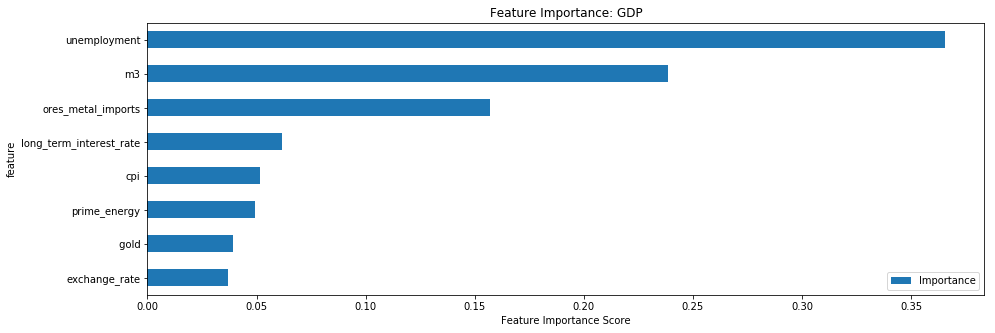

In [9]:
title = 'Feature Importance: GDP'
figsize = (15, 5)

feat_imp = pd.DataFrame({'Importance':regr1.feature_importances_})    
feat_imp['feature'] = X_gdp.columns
feat_imp.sort_values(by='Importance', ascending=False, inplace=True)
feat_imp = feat_imp

feat_imp.sort_values(by='Importance', inplace=True)
feat_imp = feat_imp.set_index('feature', drop=True)
feat_imp.plot.barh(title=title, figsize=figsize)
plt.xlabel('Feature Importance Score')
plt.show()

### Linear Model

In [10]:
# setting seed for reproducible result
pd.np.random.seed(42)

In [11]:
X_gdp.columns

Index([' gold', 'exchange_rate', 'long_term_interest_rate', 'm3',
       'unemployment', 'cpi', 'ores_metal_imports', 'prime_energy'],
      dtype='object')

In [12]:
X_gdp_reg = X_gdp.loc[:, ['m3', 'unemployment']]
X_gdp_reg.head()

,m3,unemployment
1992,0.083262,-0.005682
1993,0.061992,0.000450
1994,0.136966,-0.000800
1995,0.132802,-0.168419
1996,0.165970,0.217209


In [13]:
model = sm.OLS(y_gdp, sm.add_constant(X_gdp_reg))
linear1 = model.fit()

In [14]:
linear1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gdp   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     12.91
Date:                Sat, 02 Feb 2019   Prob (F-statistic):           0.000195
Time:                        16:15:30   Log-Likelihood:                 67.759
No. Observations:                  25   AIC:                            -129.5
Df Residuals:                      22   BIC:                            -125.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0038      0.008     -0.474      0.640      -0.021       0.013
m3               0.2969      0.065      4.593      0.000       0.163       0.431
unemployment    -0.1151      0.048     -2.402      0.025      -0.214      -0.016
==============================================================================
Omnibus:                        2.908   Durbin-Watson:                   1.512
Prob(Omnibus):                  0.234   Jarque-Bera (JB):                1.953
Skew:                          -0.684   Prob(JB):                        0.377
Kurtosis:                       3.052   Cond. No.                         19.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Plot Relationship

In [15]:
# These values are in the range of the respected variables
m3 = np.linspace(0, 22, 1000)/100
unemployment = np.linspace(-16, 22, 1000)/100

hyperplane = pd.DataFrame.from_records([m3, unemployment]).T
hyperplane.columns = ['m3', 'unemployment']

y = []
for i in range(0, hyperplane.shape[0]):
    y_i = linear1.params.const + (linear1.params.m3 * hyperplane.loc[i, 'm3']) + (linear1.params.unemployment * hyperplane.loc[i, 'unemployment'])
    y.append(y_i)
    
y = np.array(y)

xdata = X_gdp_reg['m3']
zdata = X_gdp_reg['unemployment']
ydata = y_gdp

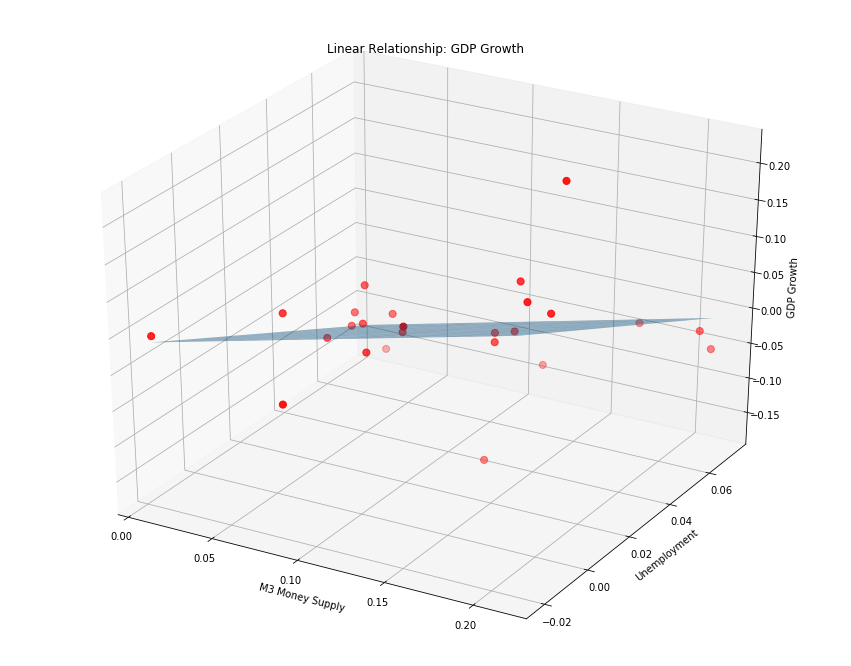

In [19]:
# Sourced from: https://gist.github.com/amroamroamro/1db8d69b4b65e8bc66a6

# some 3-dim points
x = xdata
y = ydata
z = zdata
plot_data = np.c_[x,y,z]

# regular grid covering the domain of the data
mn = np.min(plot_data, axis=0)
mx = np.max(plot_data, axis=0)
X,Y = np.meshgrid(np.linspace(mn[0], mx[0], 20), np.linspace(mn[1], mx[1], 20))

XX = X.flatten()
YY = Y.flatten()

order = 1   # 1: linear, 2: quadratic
if order == 1:
    # best-fit linear plane
    A = np.c_[plot_data[:,0], plot_data[:,1], np.ones(plot_data.shape[0])]
    C,_,_,_ = scipy.linalg.lstsq(A, plot_data[:,2])    # coefficients
    
    # evaluate it on grid
    Z = C[0]*X + C[1]*Y + C[2]

elif order == 2:
    # best-fit quadratic curve
    A = np.c_[np.ones(plot_data.shape[0]), plot_data[:,:2], np.prod(plot_data[:,:2], axis=1), plot_data[:,:2]**2]
    C,_,_,_ = scipy.linalg.lstsq(A, plot_data[:,2])
    
    # evaluate it on a grid
    Z = np.dot(np.c_[np.ones(XX.shape), XX, YY, XX*YY, XX**2, YY**2], C).reshape(X.shape)

# plot points and fitted surface
fig = plt.figure(figsize=(15,12))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.5)
ax.scatter(plot_data[:,0], plot_data[:,1], plot_data[:,2], c='r', s=50)

ax.set_zlabel('GDP Growth')
ax.set_xlabel('M3 Money Supply')
ax.set_ylabel('Unemployment')

ax.axis('tight')

plt.title('Linear Relationship: GDP Growth')
plt.show()

## Scenario Planning

For this part we use the linear model that we trained using unemployment and M3 money supply to help predict GDP growth. 

We assess three different scenarios for the period (2009 to 2010): 

1. An decrease in unemployment at the optimial level as determined by government (-4.90%) 
2. The forecasted unemployment levels as predicted by the world bank (5.06%)
3. A increase in unemployment by the same levels of 2009 (4.83)

In all three cases we assume that M3 money supply stays constant at the 2009 rate (0.008854)

**Note**: A relative grwoth rate is defined as the percent change in unemployment from one year to the next. 

### 1. A decrease in unemployment at the levels targeted by government 2009-2010

An employment growth rate of 4.9% is required to raise total employment. Given the mean of the relative growth rate is 1.1\% we push the relative growth rate to 4.9% and see how GDP reacts. 

In [59]:
data['unemployment'].describe()

count    25.000000
mean      0.011091
std       0.073180
min      -0.168419
25%      -0.006491
50%       0.003240
75%       0.048302
max       0.217209
Name: unemployment, dtype: float64

In [60]:
x = np.array([1, 0.008854, -0.049])
forecasted_gdp = linear1.predict(x)[0]
print('GDP Growth at forecasted 2010 unemployment: {}'.format(round(forecasted_gdp, 5)))

GDP Growth at forecasted 2010 unemployment: 0.00443


At these levels GDP only increases by 0.4\%. These levels would lead to an increase in GDP. Although, not a massive increase.

### 2 Forecasted Unemployment 2009-2010
Forecasted unemployment growth rate from 2009(23.7%) to 2010(24.9). Relative change of 5.06\%

In [36]:
# http://southafrica.opendataforafrica.org/vwkvxbe/south-africa-unemployment-forecast-2015-2020-and-up-to-2060-data-and-charts
(24.9  / 23.7 - 1)

0.05063291139240511

In [65]:
x = np.array([1, 0.008854, 0.05063291139240511])
forecasted_gdp = linear1.predict(x)[0]
print('GDP Growth at forecasted 2010 unemployment: {}'.format(round(forecasted_gdp, 5)))

GDP Growth at forecasted 2010 unemployment: -0.00704


Under these assumptions South Africa will enter a recession in 2010

## 3. An increase in unemployment 2009-2010.
2009 had a relative unemployment increase of 4.83%. Lets assume the same relative increase happens in 2010.

In [66]:
x = np.array([1, 0.008854, 0.0483])
forecasted_gdp = linear1.predict(x)[0]
print('GDP Growth at increased unemployment: {}'.format(round(forecasted_gdp, 5)))

GDP Growth at increased unemployment: -0.00677


Under these assumptions South Africa will enter a recession in 2010

### Conclusion
At these levels we recommend our investors to explore other emerging markets for sources of returns.